In [208]:
import subprocess 
import pandas as pd
import numpy as np 
import re
import requests
import matplotlib.pyplot as plt 
%matplotlib inline     

In [217]:
df_providers = pd.read_csv('data/providers.csv')
df_reimbursements = pd.read_csv('data/reimbursements.csv')

In [222]:
df = pd.merge(
      df_providers
    , df_reimbursements
    , on="Provider Name"
    , how="left", 
      suffixes=['','┌∩┐(◣_◢)┌∩┐']
    ).fillna('0') 

df.drop(
    [c for c in df.columns if '┌∩┐(◣_◢)┌∩┐' in c]
    , axis=1
    , inplace=True
    )

states = set(df.State)

for col in ['Payment','Claims Paid for Testing','Claims Paid for Treatment']:
    df[col] = df[col].apply(
        lambda x: re.sub('\D', '', x)
    ).astype(float)
 
df['Claims']=df['Claims Paid for Testing']+df['Claims Paid for Treatment']

df_provider_reimbursements = df 

In [224]:
df=df_provider_reimbursements
df=df[['Provider Name', 'State', 'Payment', 'Claims']
      ].groupby(['Provider Name', 'State']).sum()
df.loc[df.Claims > 0]

,,Payment,Claims
Provider Name,State,,
24 ON PHYSICIANS PC,GA,17776704.0,128430.0
360 CLINICS PLLC,TX,374.0,19929.0
A2Z DIAGNOSTICS LLC,NJ,48618.0,44130.0
AAA AMBULANCE SERVICE,MS,1048920.0,23248.0
AARON I JENG MD INC,CA,19328.0,647.0
...,...,...,...
YES WELLNESS PA,NJ,11816.0,288.0
YORK GENERAL HOSPITAL,NE,10650928.0,12427.0
YORK HOSPITAL,ME,7347826.0,105396.0


In [179]:
df=df_provider_reimbursements
df=df[['Provider Name', 'State', 'Payment', 'Claims']].groupby(['Provider Name', 'State']).count()
df.loc[(df.Claims > 0) & (df.Payment > 0)]

,,Claims
Provider Name,State,
"""D"" KLAN INC.",NV,1
"#A1 DIABETES & MEDICAL SUPPLY, INC.",TN,1
"'A' STREET CLINIC OF CHIROPRACTIC, PLLC",WA,1
(RIVERSIDE FAMILY MEDICINE),TN,1
"007 SMILES, INC",FL,1
...,...,...
"ZYWIE, INC.",GA,1
ZZM INVESTMENTS,IL,1
ZZZ ANESTHESIA,CA,1


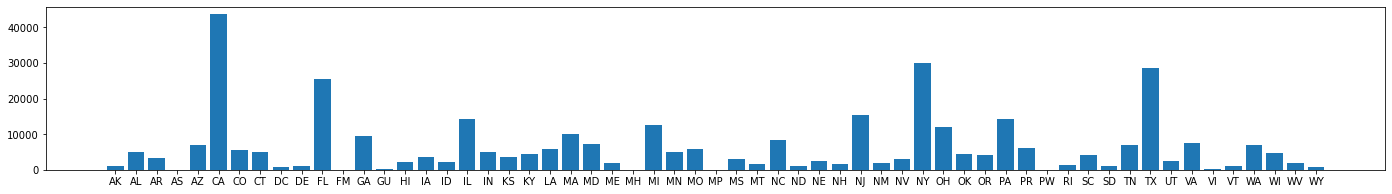

In [225]:
df=df_provider_reimbursements 
df=df[['Provider Name', 'State', 'Payment', 'Claims']].groupby(['State']).agg({'Payment':'sum', 'Claims':'count'})
plt.figure(figsize=(24,3))
plt.bar(df.index,df['Claims'])
plt.show()

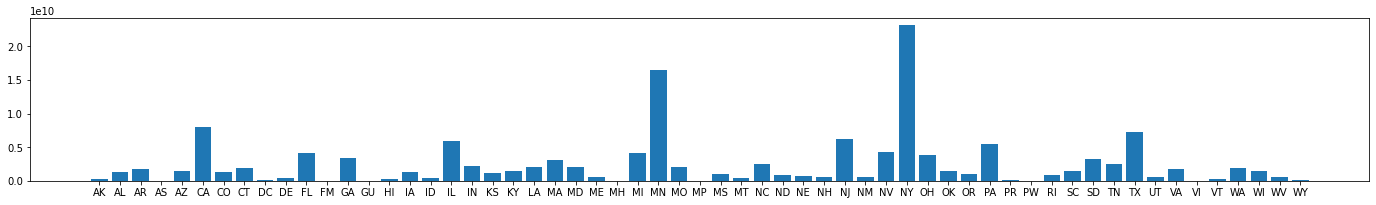

In [226]:
fig, ax = plt.subplots(figsize=(24, 3)) 
ax = plt.subplot(111) 
ax.bar(df.index, df['Payment']  )  
plt.show()


In [ ]:
class Main(object):
    def __init__(self):
        self.context = ''
    def tomodel(self, col_names):
        d = {}
        #subprocess.call(["C:\\Users\\Tim\\AppData\\Local\\Programs\\Microsoft VS Code\\Code.exe" ]) 
        for col_name in col_names:  
            key = col_name
            for char in col_name: 
                if not char.isalpha():
                    key = key.replace(char,'')        
            d[key] = col_name.replace('\'','').replace('  ','').strip()
        return d  
    def tonum(num):
        try:
            num=re.sub('\D', '', str(num))
        except:
            print (num)  
        return num.astype(float)
m = Main()
m.tomodel(df_providers.columns)

In [ ]:
#df_main= df.rename(columns=lambda x: ''.join([c for c in x if c.isalpha()]), inplace=True)  

In [ ]:
#┌∩┐(◣_◢)┌∩┐
#╭∩╮(Ο_Ο)╭∩╮
#   ≧◔◡◔≦